# CASE STUDY 1B: CLUSTERING OF DOCUMENTS USING R

In [1]:
#Load libraries
library(readr)
library(proxy)
library(RTextTools)
library(fpc)
library(wordcloud)
library(cluster)
library(tm)
library(stringi)
library(textmineR)
library(factoextra)
library(ggplot2)

Warning message:
"package 'proxy' was built under R version 3.6.3"
Attaching package: 'proxy'

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Warning message:
"package 'RTextTools' was built under R version 3.6.3"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.2"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve

Warning message:
"package 'fpc' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'stringi' was built under R version 3.6.2"Warning message:
"package 'textmineR' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'textmineR'

The following object

In [2]:
#Load dataset from the github
data <- read.csv("https://raw.githubusercontent.com/textmining-utl/chapter1/master/dataset.csv?token=ARBWLQ2P3JUCDWUN775L2TTAFS6B6")

In [3]:
#Create Document Term Matrix
dtm <- CreateDtm(doc_vec = data$Abstract,
                 doc_names = data$S.No.,
                 ngram_window = c(1,2),
                 stopword_vec = c(stopwords::stopwords("en"),
                                  stopwords::stopwords(source = 'smart')),
                 lower = TRUE, 
                 remove_punctuation = TRUE,
                 remove_numbers = TRUE,
                 verbose = FALSE,
                 cpus = 2)

Warning message in CreateDtm(doc_vec = data$Abstract, doc_names = data$S.No., ngram_window = c(1, :
"No document names detected. Assigning 1:length(doc_vec) as names."

In [4]:
#Construct matrix of term counts to get IDF vector
tf_mat <- TermDocFreq(dtm)

#TF-IDF
tfidf <- t(dtm[ , tf_mat$term ]) * tf_mat$idf
tfidf <- t(tfidf)

#Convert TF-IDF matrix to standard R matrix
m <- as.matrix(tfidf)

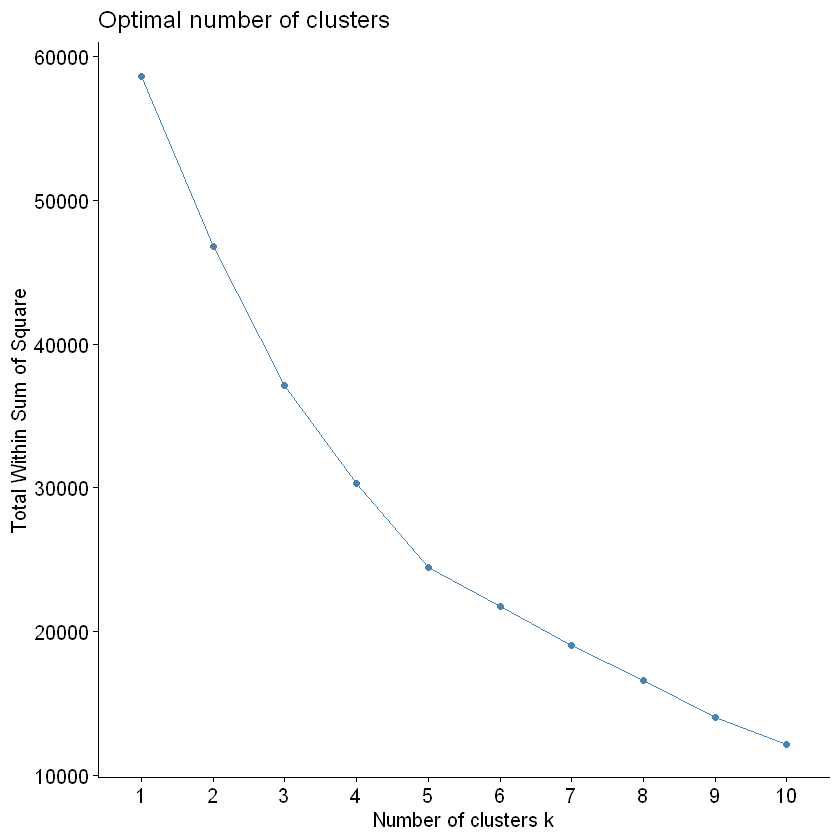

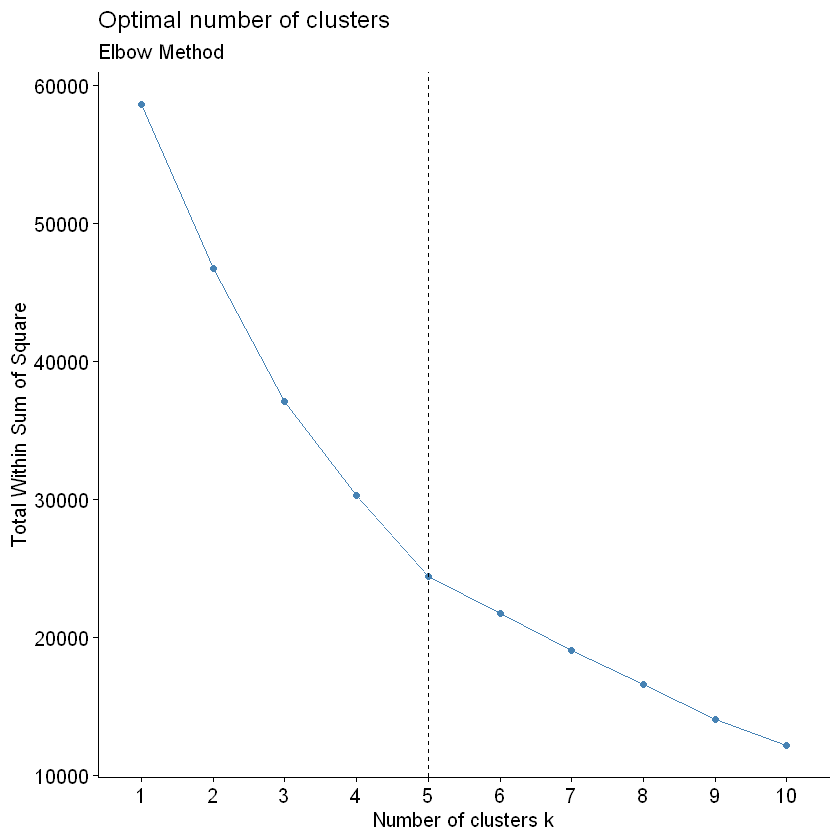

In [5]:
#Determine the number of K for clustering
fviz_nbclust(m, kmeans, method = "wss")
fviz_nbclust(m, kmeans, method = "wss") + geom_vline(xintercept = 5, linetype = 2) + labs(subtitle = "Elbow Method")

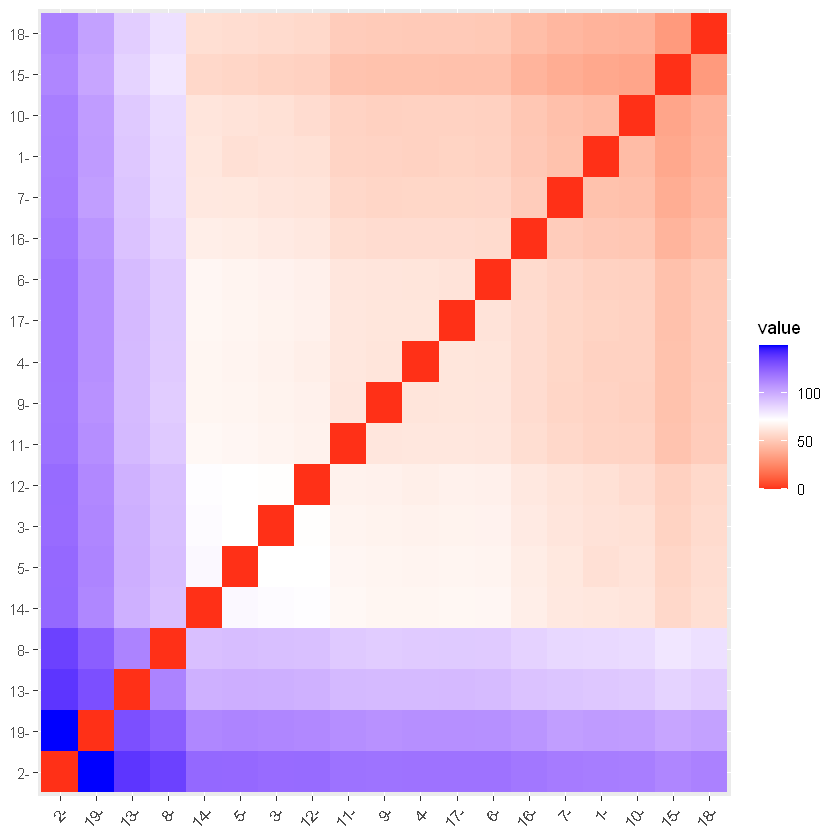

In [6]:
#Compute Distance Matrix
require(stats)
res.dist <- dist(x=m, method = "euclidean")

#Visualizing distance matrices
fviz_dist(res.dist)

Loading required package: factorextra
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'factorextra'"

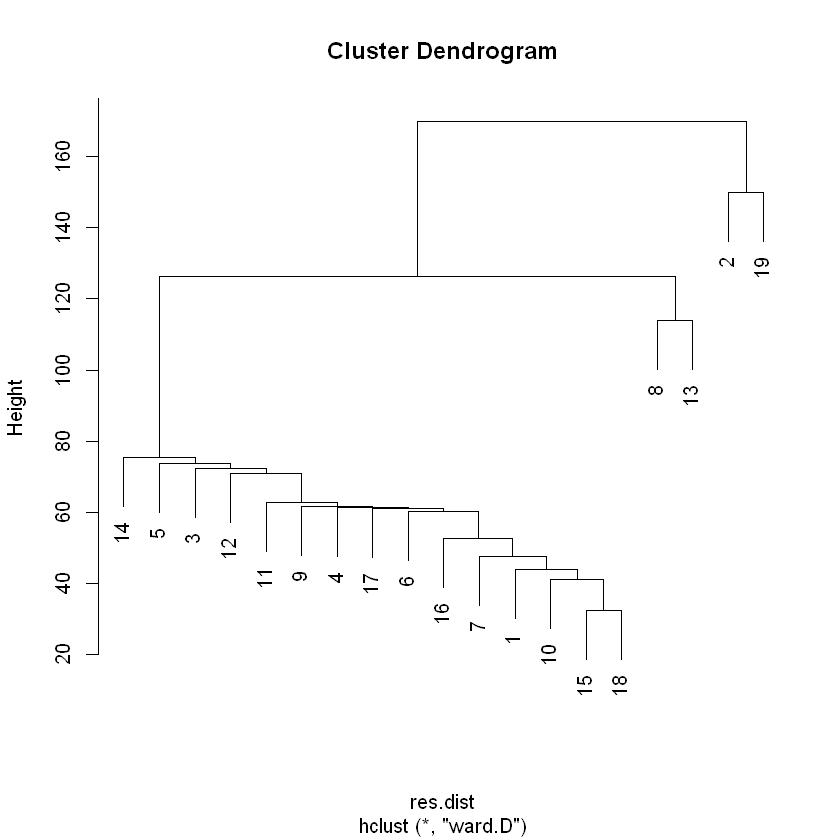

Loading required package: ggsci


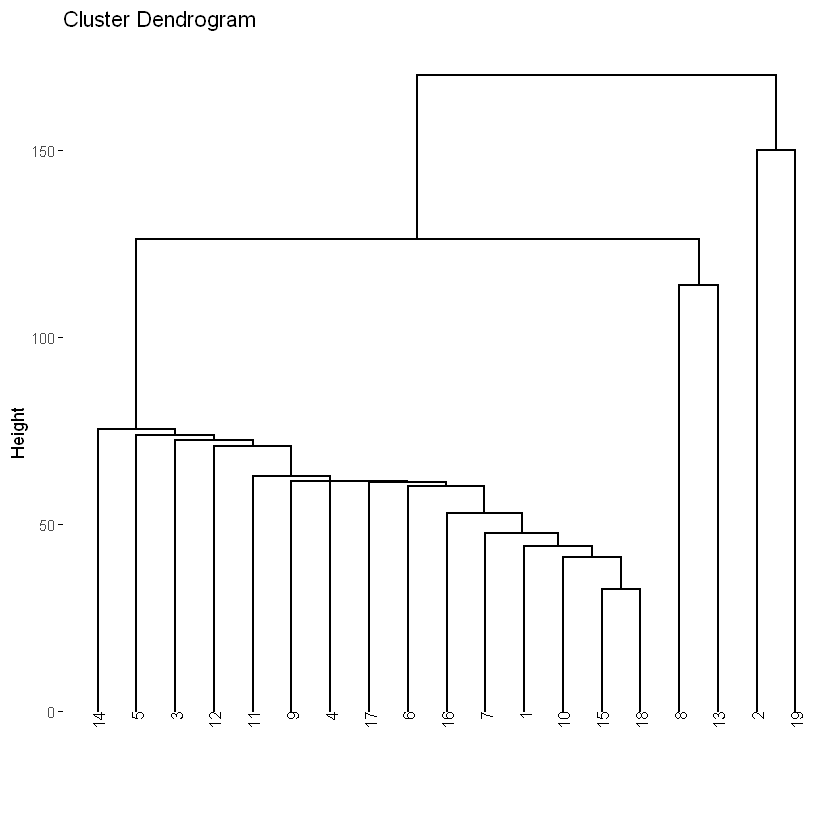

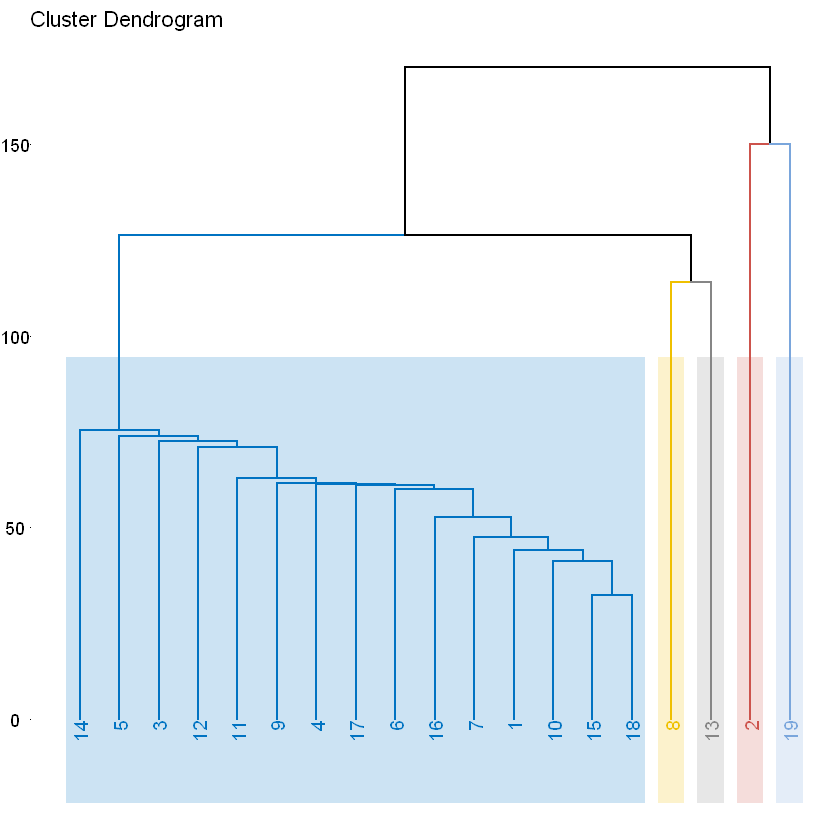

In [7]:
# Agglomerative hierarchical clustering
require(stats)
res.hc <- hclust(d = res.dist, 
                 method = "ward.D")
plot(x = res.hc)

#Coloring Dendogram
require(factorextra)
fviz_dend(x=res.hc, cex = 0.7, lwd = 0.7)
require("ggsci")
fviz_dend(x=res.hc, cex = 0.8, lwd = 0.8, k=5, rect = TRUE, k_colors = "jco", rect_border = "jco", rect_fill = TRUE, ggtheme = theme_void())

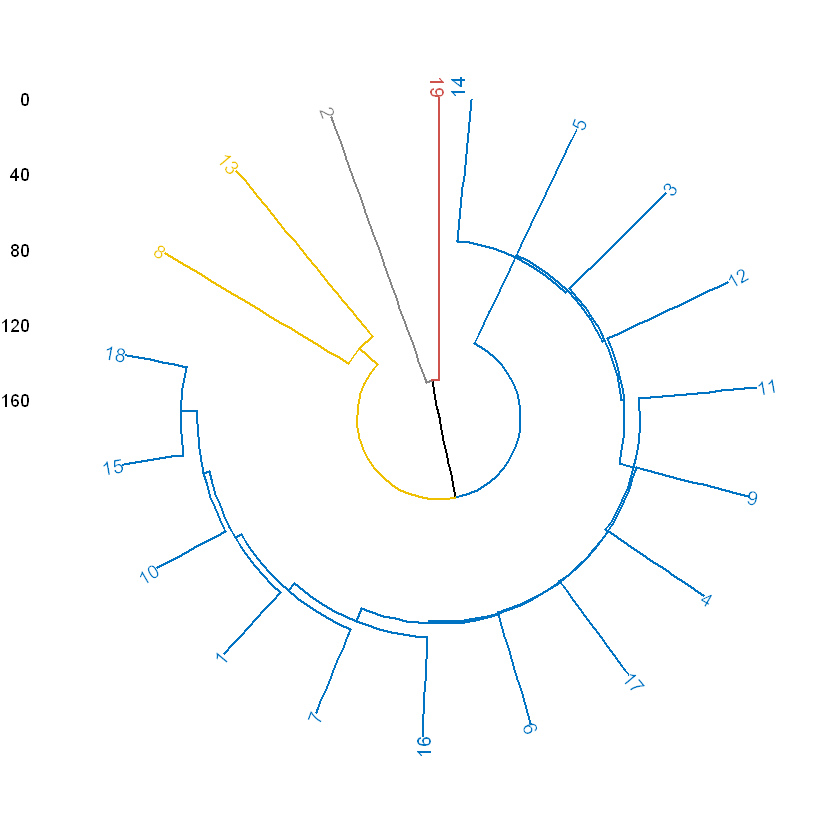

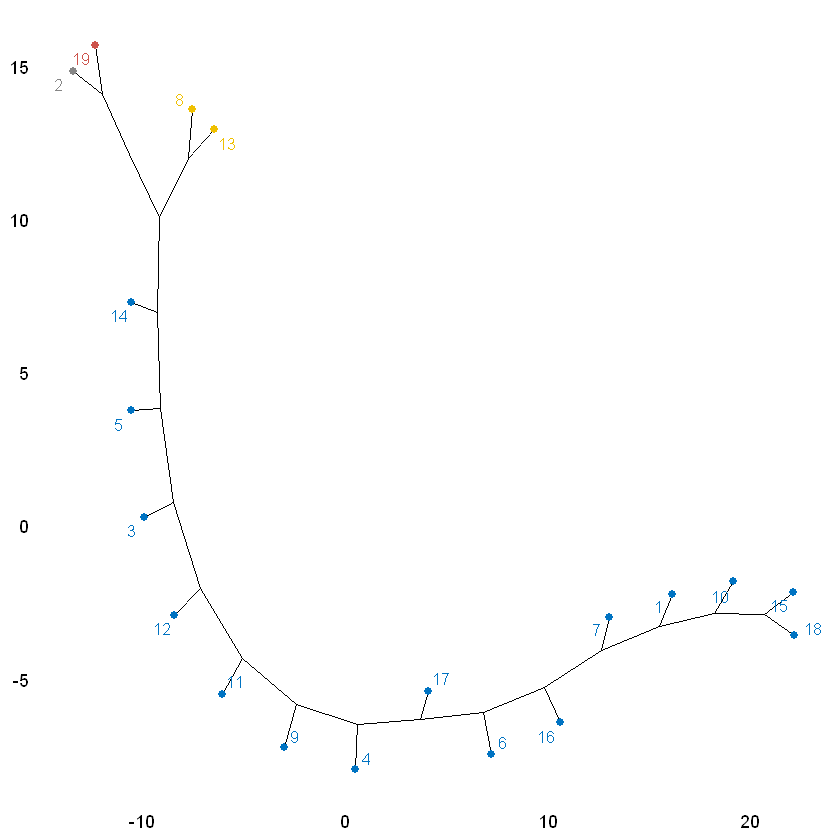

In [8]:
#Different types of dendogram
fviz_dend(res.hc, cex = 0.8, lwd = 0.8, k= 4,
          rect = TRUE,
          k_colors = "jco",
          rect_border = "jco",
          rect_fill = TRUE,
          type = "circular",
          repel = TRUE)

fviz_dend(res.hc, cex = 0.8, lwd = 0.8, k= 4,
          rect = TRUE,
          k_colors = "jco",
          rect_border = "jco",
          rect_fill = TRUE,
          type = "phylogenic",
          repel = TRUE)